# ENCH 470 Spring 2024 Assignment 4


**<font color=red>Problem:</font> Create a small numpy array, put each entry into a different location in a string, and save it in a file.**

In [11]:
import numpy as np
x= np.array([2,5,4,7,6,9])
print(x)

mystring= '{0} is an even number and {1} is odd'.format(x[0],x[1],)
print(mystring)
with open('mystring.txt','w') as f:
 f.write(mystring)


[2 5 4 7 6 9]
2 is an even number and 5 is odd


**<font color=red>Problem:</font> Look up three DataFrame methods not covered in class and use them here to inspect the `ThermoProperties.csv` dataset.**

In [26]:
import pandas as pd
ThermoProperties= pd.read_csv('ThermoProperties.csv')
ThermoProperties
#using info() method
print('summary information about the dataset:')
print(thermo_data.info())
#using value counts() method on a specific column
print("\n3. Value counts of 'acentric factor' column:")
print(thermo_data['acentric factor'].value_counts())
#Using isnull() method to check for missing values
print("\n5. Missing value check:")
print(thermo_data.isnull().sum())


summary information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      6031 non-null   object 
 1   molweight                 6031 non-null   float64
 2   critical temperature (K)  6031 non-null   float64
 3   acentric factor           6031 non-null   float64
 4   boiling point (K)         6031 non-null   float64
dtypes: float64(4), object(1)
memory usage: 235.7+ KB
None

3. Value counts of 'acentric factor' column:
acentric factor
0.4320    98
0.4910    65
0.4610    59
0.4190    45
0.5190    44
          ..
0.9660     1
0.9470     1
0.9600     1
0.9550     1
0.3449     1
Name: count, Length: 926, dtype: int64

5. Missing value check:
name                        0
molweight                   0
critical temperature (K)    0
acentric factor             0
boiling point (K)     

According to https://en.wikipedia.org/wiki/Acentric_factor, the acentric factor $\omega = - log_{10}(p_r^{sat}) - 1$ at $T_r$ = 0.7. It's a measure of the reduced saturated vapor pressure $p_r^{sat} = \frac{p}{p_c^{sat}}$ at the reduced temperature of 0.7, $T_r = \frac{T}{T_c} = 0.7$. 

**<font color=red>Problem:</font> Calculate $p_r^{sat}$ for each of these molecules, add it to the DataFrame, and display the tail of the new DataFrame**

In [27]:
𝜔=ThermoProperties['acentric factor']
def psatfunc(a):
    psat=10**-(a+1)
    return psat
ThermoProperties['psat value']=psatfunc(𝜔)
print(ThermoProperties.tail())

                    name  molweight  critical temperature (K)  \
6026               water   18.01528                    647.13   
6027             xylenes  106.16740                    620.21   
6028   zirconium bromide  410.84000                    805.00   
6029  zirconium chloride  233.03480                    778.00   
6030    zirconium iodide  598.84188                    960.00   

      acentric factor  boiling point (K)  psat value  
6026           0.3449             373.15    0.045196  
6027           0.3170             413.15    0.048195  
6028           0.3100             633.15    0.048978  
6029           0.2980             604.15    0.050350  
6030           0.3430             704.15    0.045394  


**<font color=red>Problem:</font> Pick a cutoff between the two peaks in the acentric factor and create two DataFrames with molecules above and below the cutoff.**

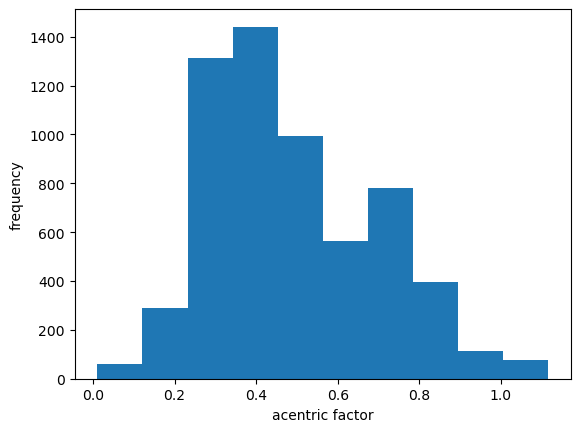

In [42]:
from matplotlib import pyplot as plt
plt.hist(ThermoProperties['acentric factor'], bins=10)
plt.xlabel('acentric factor')
plt.ylabel('frequency')
plt.show()
#using 0.4 cutoff value for accentric factor
lowendvalue=ThermoProperties.loc[ThermoProperties['acentric factor'] <=0.4]
highendvalue=ThermoProperties.loc[ThermoProperties['acentric factor'] >=0.4]


**<font color=red>Problem:</font> Plot "boiling point vs. molweight" in a scatter plot, and use a different color for the molecules that are above and below the acentric factor cutoff.**

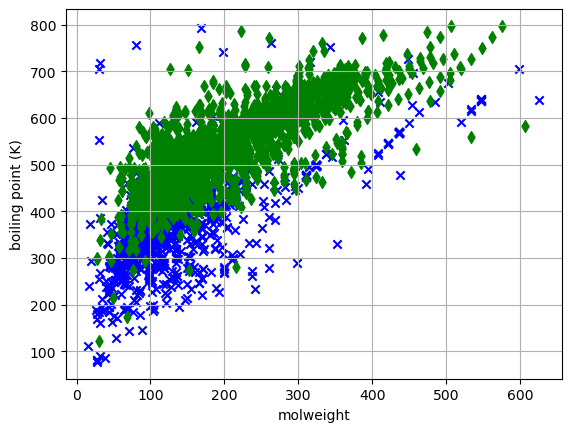

In [46]:
fig, ax = plt.subplots()

ax.scatter(lowendvalue['molweight'], lowendvalue['boiling point (K)'], color = 'blue', marker = 'x')
ax.scatter(highendvalue['molweight'], highendvalue['boiling point (K)'], color = 'green',  marker = 'd')
ax.set_xlabel('molweight')
ax.set_ylabel('boiling point (K)')
ax.grid()